### Import necessary libarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1.0


In [3]:
print (data.shape)
print (data.dtypes)

(205, 16)
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Brand               float64
dtype: object


In [4]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.429268
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.693896
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,2.000000


In [5]:
data.corr()["price"]

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Brand               0.861011
Name: price, dtype: float64

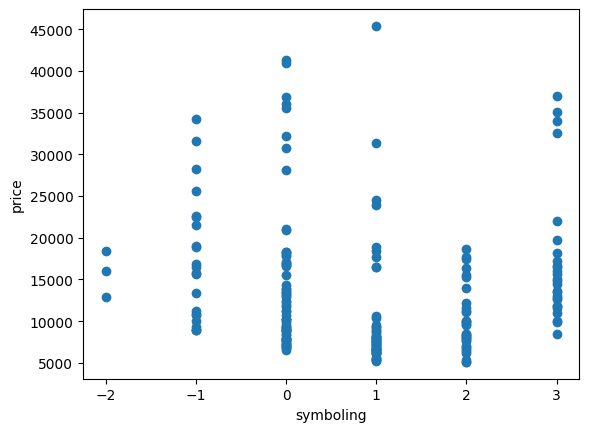

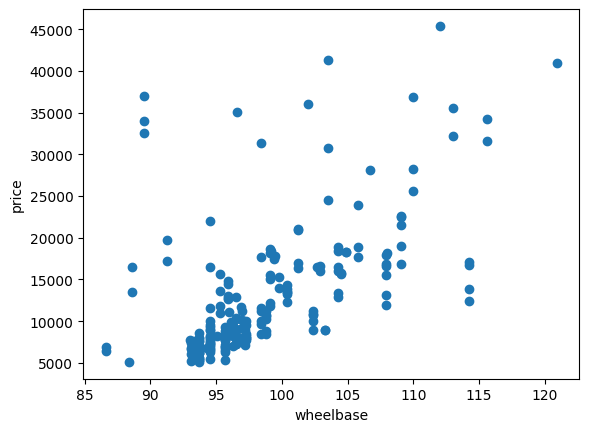

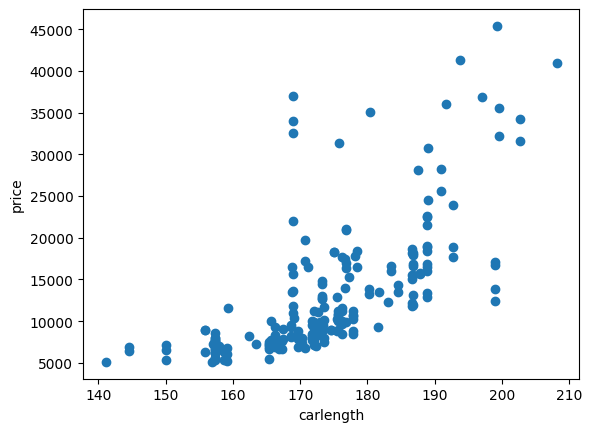

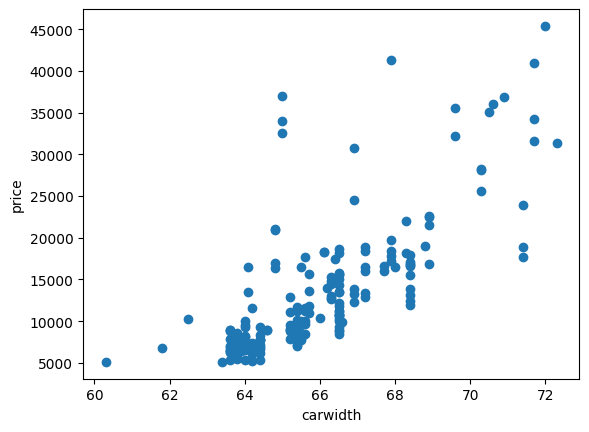

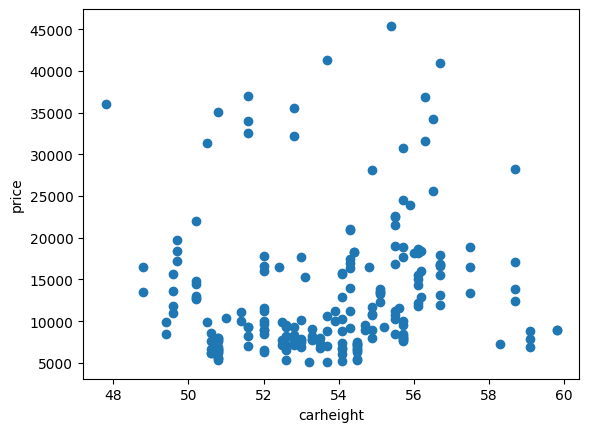

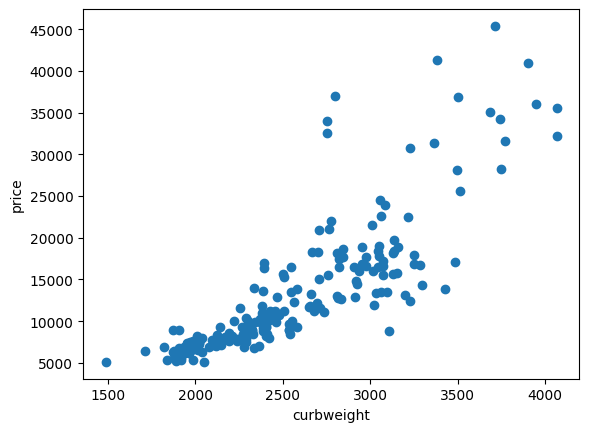

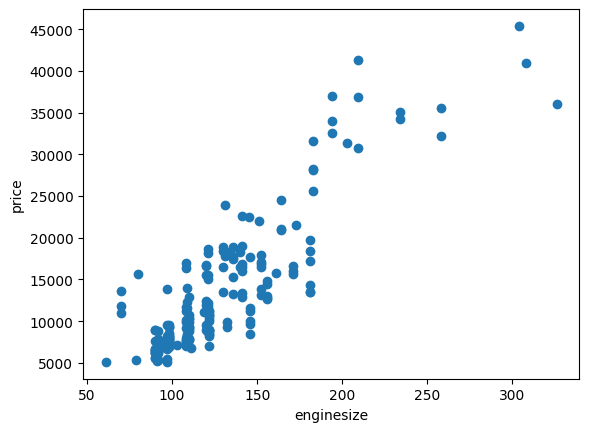

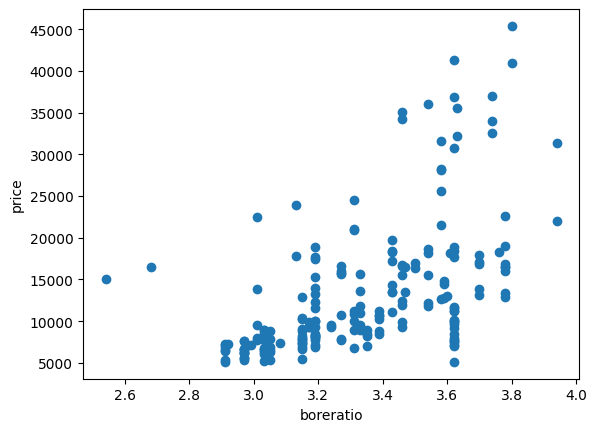

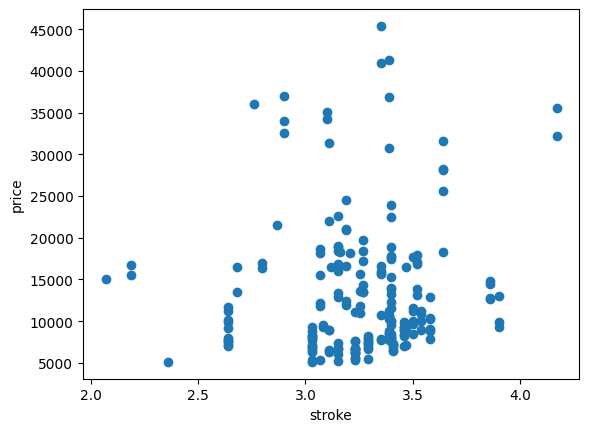

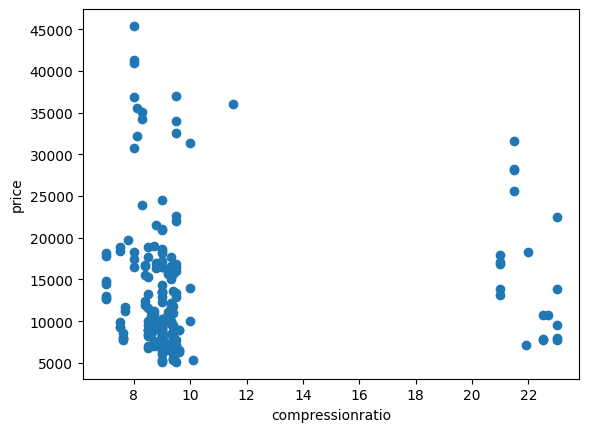

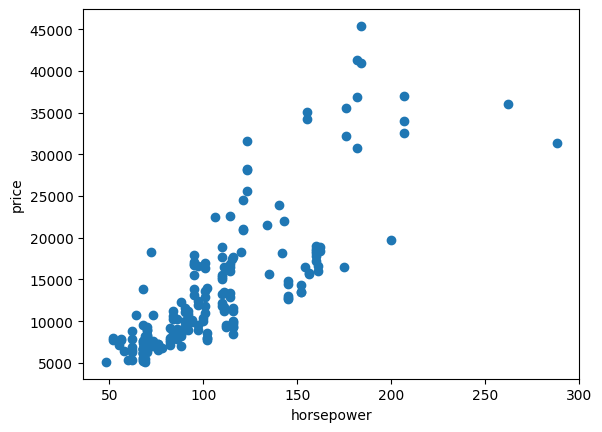

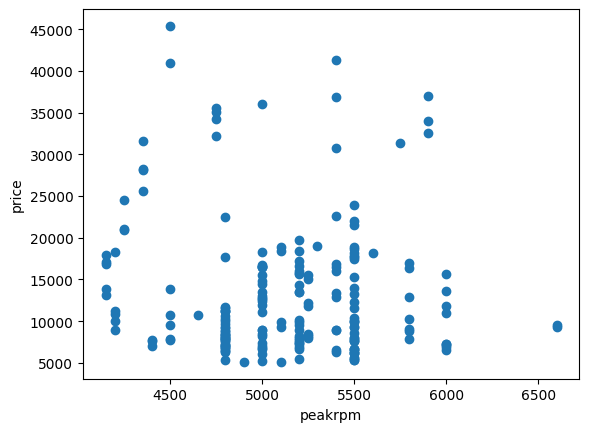

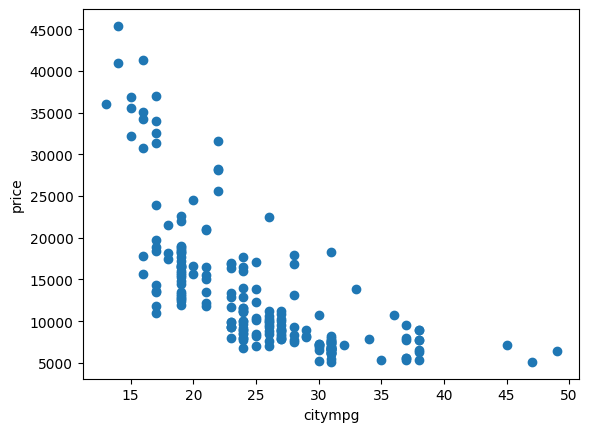

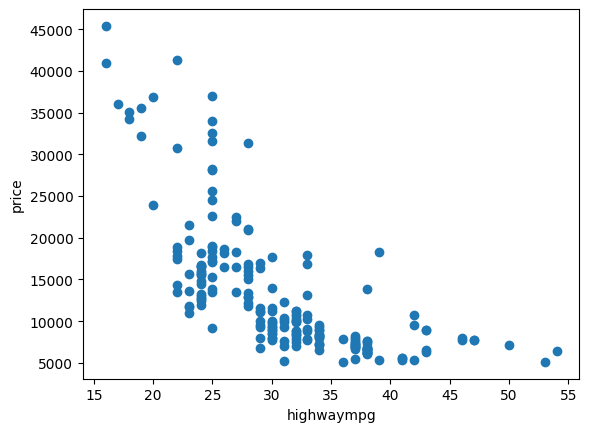

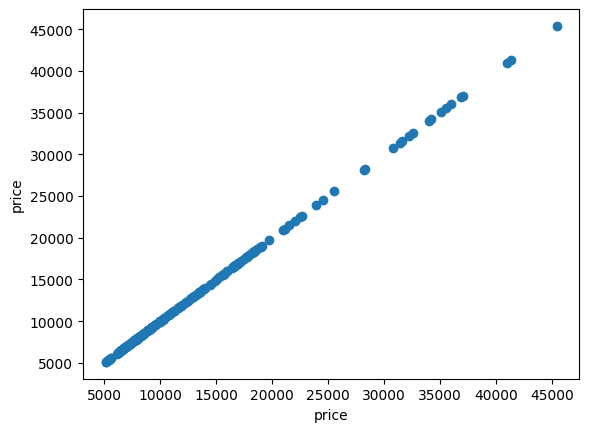

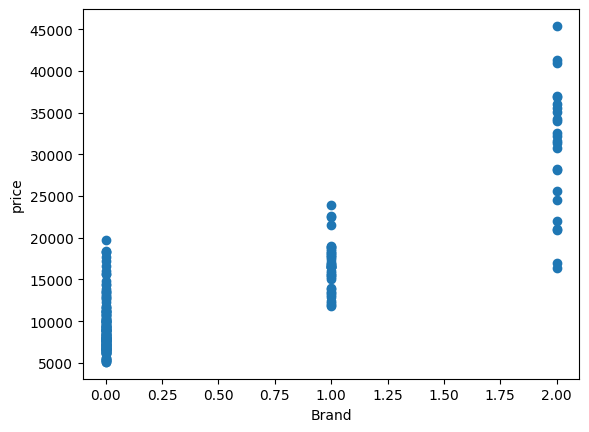

In [6]:
# Visualize the data
for col in data.columns:
    plt.scatter(data[col], data["price"])
    plt.xlabel(col)
    plt.ylabel("price")
    plt.show()

<Axes: >

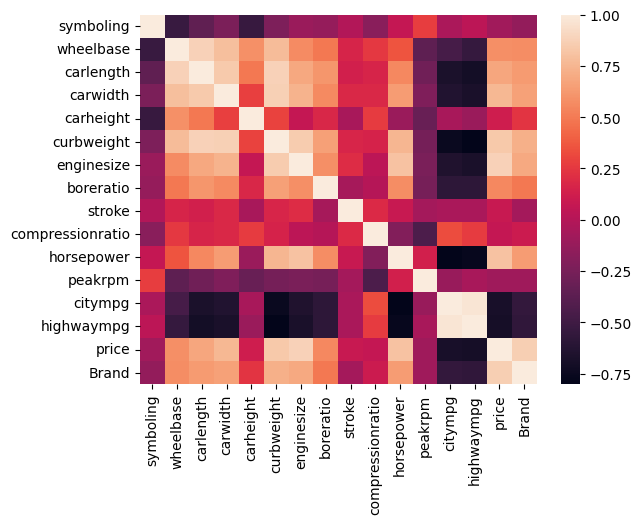

In [7]:
sns.heatmap(data.corr())

In [8]:
corr_cols: list = []
for col in data.columns:
    if (c := data.corr()["price"][col]) > 0.6:
        corr_cols.append(col)
        print (col, c)
print (corr_cols)

carlength 0.6829200156779629
carwidth 0.759325299741511
curbweight 0.8353048793372975
enginesize 0.8741448025245117
horsepower 0.8081388225362214
price 1.0
Brand 0.8610110467479672
['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price', 'Brand']


In [9]:
data = data[corr_cols]
print (data.shape)
data.head()

(205, 7)


,carlength,carwidth,curbweight,enginesize,horsepower,price,Brand
0,168.8,64.1,2548,130,111,13495.0,1.0
1,168.8,64.1,2548,130,111,16500.0,1.0
2,171.2,65.5,2823,152,154,16500.0,1.0
3,176.6,66.2,2337,109,102,13950.0,1.0
4,176.6,66.4,2824,136,115,17450.0,1.0


In [10]:
# Missing values
print (data.isnull().sum())

carlength     0
carwidth      0
curbweight    0
enginesize    0
horsepower    0
price         0
Brand         0
dtype: int64


There's no any missing value

### Save changes

In [11]:
data.to_csv("corr_data.csv", index = False)